<a href="https://colab.research.google.com/github/AninditaDeb26/CNN/blob/main/Anindita_Deb_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [3]:
pip install gdown

In [11]:
import gdown

file_id = '1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs'
output_name = 'CNN_assignment.zip'

url = 'https://drive.google.com/uc?export=download&id={}'
gdown.download(url.format(file_id), output_name, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs
To: /content/CNN_assignment.zip
100%|██████████| 824M/824M [00:07<00:00, 109MB/s]


'CNN_assignment.zip'

In [12]:
!unzip "CNN_assignment.zip"

Archive:  CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inflating: Skin cancer ISIC The I

In [24]:
import pathlib
import tensorflow as tf
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import PIL

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

from tensorflow.keras.preprocessing.image import load_img

In [15]:
# Defining the path for train and test images from dataset
train_data = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
test_data = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test/")

In [16]:
#Train image count
train_count = len(list(train_data.glob('*/*.jpg')))
print(train_count)

#Test image count
test_count = len(list(test_data.glob('*/*.jpg')))
print(test_count)

2239
118


# Data Visualisation

Found 2239 files belonging to 9 classes.


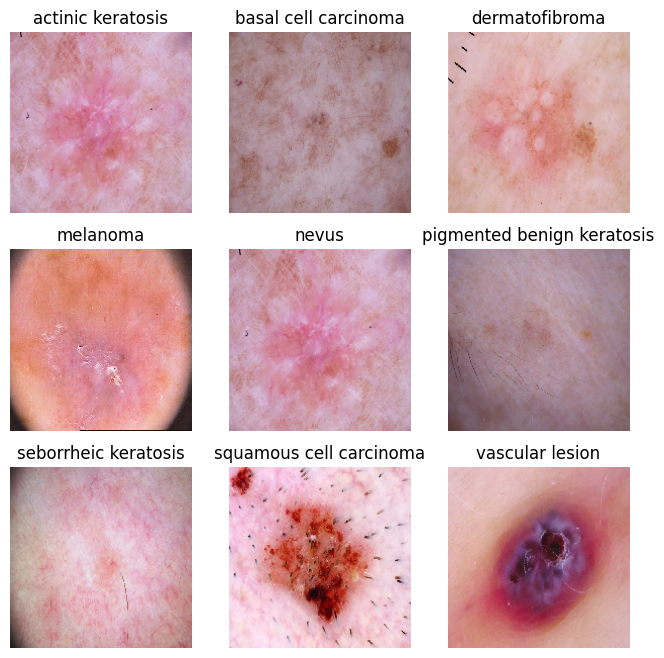

In [26]:
# Visualize one instance of all the class present in the dataset.

# Creating train & validation dataset from the train directory with a batch size of 32 .
# Resizing images to 180*180.(10%)
image_dataset = tf.keras.preprocessing.image_dataset_from_directory(train_data, batch_size=32, image_size=(180,180),
                                                                    label_mode='categorical',seed=123)

#all the classes of Skin Cancer
class_names = image_dataset.class_names

#Dictionary to store the path of image as per the class
files_path_dict = {}

for c in class_names:
    files_path_dict[c] = list(map(lambda x:str(train_data)+'/'+c+'/'+x,os.listdir(str(train_data)+'/'+c)))

#Visualize image
plt.figure(figsize=(8,8))
index = 0
for c in class_names:
    path_list = files_path_dict[c][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(180,180)))
    plt.title(c)
    plt.axis("off")

# Visualize one instance of all the nine classes present in the dataset

In [29]:
def class_distribution_count(directory):

    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]

    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'Image Count'])

df = class_distribution_count(train_data)
df

,Class,Image Count
0,seborrheic keratosis,77
1,melanoma,438
2,nevus,357
3,dermatofibroma,95
4,pigmented benign keratosis,462
5,basal cell carcinoma,376
6,actinic keratosis,114
7,squamous cell carcinoma,181
8,vascular lesion,139


<Axes: xlabel='Image Count', ylabel='Class'>

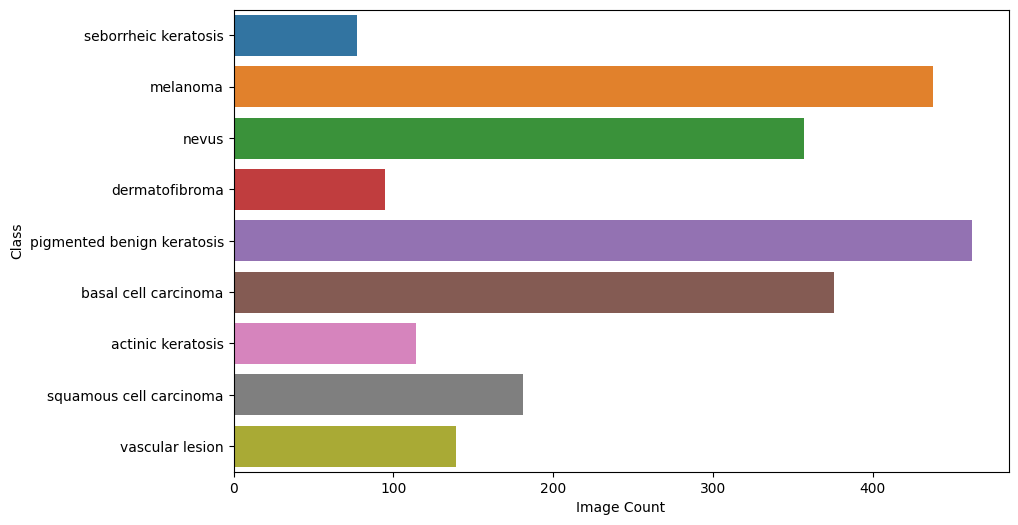

In [31]:
# Visualize the Number of images in each class.
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x="Image Count", y="Class", data=df,
            label="Class")

# Using Augmentor package to solve class imbalance

In [32]:
#install Augmentor
!pip install Augmentor

In [33]:
training_dataset_directory="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"

import Augmentor

for i in class_names:
    p = Augmentor.Pipeline(training_dataset_directory + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)  #Adding 500 samples per class to make sure that none of the classes are sparse

Initialised with 114 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x79ABB0CEBE20>: 100%|██████████| 500/500 [00:19<00:00, 25.01 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79ABB0D32A70>: 100%|██████████| 500/500 [00:21<00:00, 23.02 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x79ABB1E30E50>: 100%|██████████| 500/500 [00:26<00:00, 18.87 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x79ABB0D1FF40>: 100%|██████████| 500/500 [01:58<00:00,  4.21 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x79ABB0D8BC40>: 100%|██████████| 500/500 [01:34<00:00,  5.30 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79ABB1DC5120>: 100%|██████████| 500/500 [00:18<00:00, 27.65 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x79ABB0C95240>: 100%|██████████| 500/500 [00:44<00:00, 11.24 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79ABB0D88820>: 100%|██████████| 500/500 [00:17<00:00, 27.81 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79ABB0B8FF70>: 100%|██████████| 500/500 [00:18<00:00, 27.59 Samples/s]


In [34]:
# Total number of images generated by Augmentor
train_image_count_aug = len(list(train_data.glob('*/output/*.jpg')))
print(train_image_count_aug)

4500


# Model Building

In [35]:
# train dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(train_data, batch_size=32,
                                                               image_size=(180,180), label_mode='categorical',
                                                               seed=123,subset="training",
                                                               validation_split=0.2)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [36]:
# validation dataset
val_ds =tf.keras.preprocessing.image_dataset_from_directory(train_data,batch_size=32,
                                                            image_size=(180,180), label_mode='categorical',
                                                            seed=123,subset="validation",
                                                            validation_split=0.2)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [37]:
#tf.data.experimental.AUTOTUNE defines appropriate number of processes that are free for working.

AUTOTUNE = tf.data.experimental.AUTOTUNE

#`Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

#`Dataset.prefetch() overlaps data preprocessing and model execution while training.

val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [38]:
#CNN Model Architecture

#Sequential allows you to create models layer-by-layer
model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 50% Fraction of the input units to drop.
model.add(layers.Dropout(0.5))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dropout layer with 25% Fraction of the input units to drop.
model.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

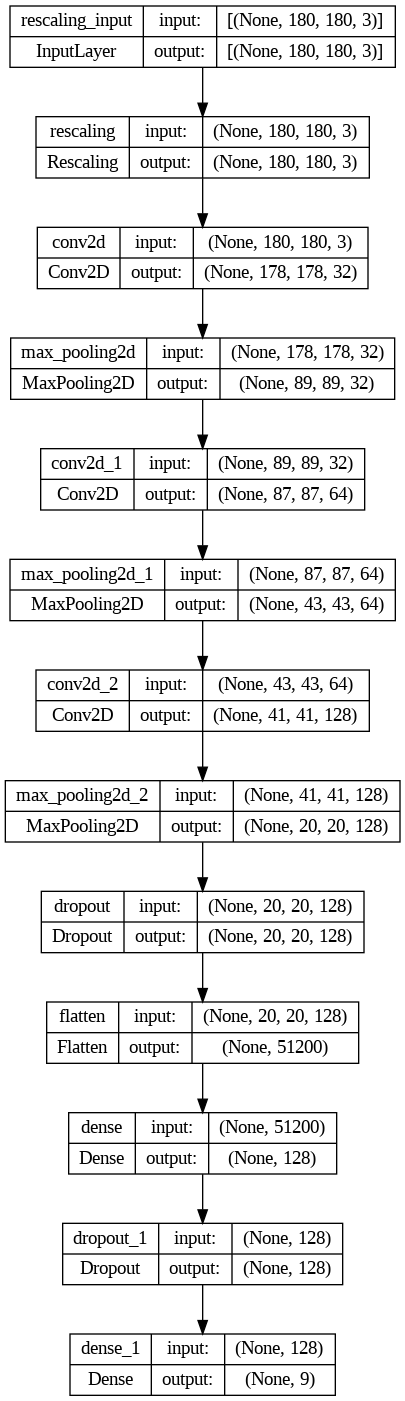

In [39]:
# vizualizing the model
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [40]:
# Compile the Model

# Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
# categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.

model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

# ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training from the state saved.
checkpoint = ModelCheckpoint("model.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)

# Stop training when a monitored metric has stopped improving.
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

In [41]:
# Train the model
epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs,callbacks=[checkpoint,earlystop])

Epoch 1/20
169/169 [==============================] - ETA: 0s - loss: 1.9140 - accuracy: 0.2698
Epoch 1: val_accuracy improved from -inf to 0.42390, saving model to model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


169/169 [==============================] - 439s 2s/step - loss: 1.9140 - accuracy: 0.2698 - val_loss: 1.5413 - val_accuracy: 0.4239
Epoch 2/20
169/169 [==============================] - ETA: 0s - loss: 1.5878 - accuracy: 0.3993
Epoch 2: val_accuracy improved from 0.42390 to 0.49517, saving model to model.h5
169/169 [==============================] - 386s 2s/step - loss: 1.5878 - accuracy: 0.3993 - val_loss: 1.3681 - val_accuracy: 0.4952
Epoch 3/20
169/169 [==============================] - ETA: 0s - loss: 1.3845 - accuracy: 0.4727
Epoch 3: val_accuracy improved from 0.49517 to 0.55011, saving model to model.h5
169/169 [==============================] - 397s 2s/step - loss: 1.3845 - accuracy: 0.4727 - val_loss: 1.2051 - val_accuracy: 0.5501
Epoch 4/20
169/169 [==============================] - ETA: 0s - loss: 1.2440 - accuracy: 0.5386
Epoch 4: val_accuracy improved from 0.55011 to 0.59911, saving model to model.h5
169/169 [==============================] - 414s 2s/step - loss: 1.2440 - 

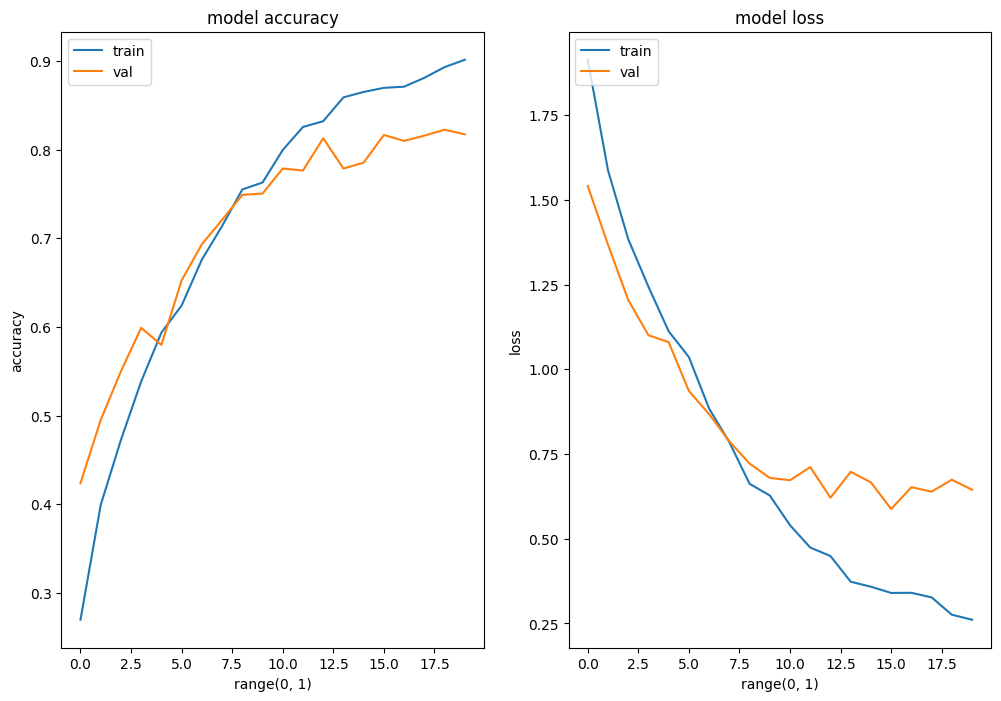

In [44]:
# Plot the training curves

epochs_range = range(earlystop.stopped_epoch+1)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)

#Plot Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')

#Plot Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Model Prediction

1/1 [==============================] - 0s 41ms/step
Actual Class basal cell carcinoma
Predictive Class pigmented benign keratosis


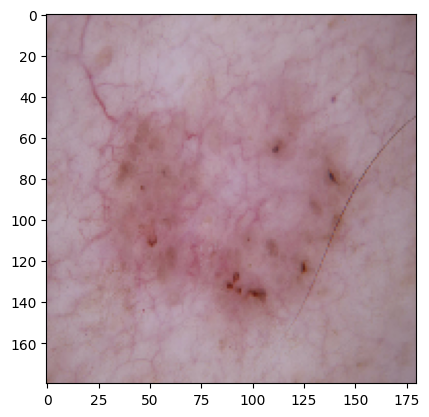

In [46]:
from glob import glob
Test_image_directory = os.path.join(test_data, class_names[1], '*')
Test_image = glob(Test_image_directory)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[1] +'\n'+ "Predictive Class "+pred_class )